In [15]:
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 200

#set initial random state
rs = 328537
np.random.seed(rs)

In [2]:
DATASETPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/development.csv"
dataset = pd.read_csv(DATASETPATH)

display(dataset)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],pmax[3],negpmax[3],area[3],tmax[3],rms[3],pmax[4],negpmax[4],area[4],tmax[4],rms[4],pmax[5],negpmax[5],area[5],tmax[5],rms[5],pmax[6],negpmax[6],area[6],tmax[6],rms[6],pmax[7],negpmax[7],area[7],tmax[7],rms[7],pmax[8],negpmax[8],area[8],tmax[8],rms[8],pmax[9],negpmax[9],area[9],tmax[9],rms[9],pmax[10],negpmax[10],area[10],tmax[10],rms[10],pmax[11],negpmax[11],area[11],tmax[11],rms[11],pmax[12],negpmax[12],area[12],tmax[12],rms[12],pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14],pmax[15],negpmax[15],area[15],tmax[15],rms[15],pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,3.811328,-23.747293,3.621973,15.200000,1.531228,4.893027,-18.008972,7.215259,70.594160,0.938042,9.322305,-19.477101,5.520791,72.400000,1.412877,3.077338,-19.239130,2.079597,28.400000,1.242361,3.633856,-17.555292,1.456941,66.400000,1.521403,26.581253,-15.625539,13.374258,72.200000,1.211460,99.361264,-56.828006,48.422567,72.0,0.971254,42.068393,-19.716336,23.152819,72.000000,1.285425,12.438458,-18.148151,7.611376,72.200000,0.904157,4.559802,-18.432141,2.288938,38.40000,0.939772,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969,149.648736,-18.546884,146.036298,72.276594,1.196239,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,3.940369,-5.427002,3.444678,200.200000,1.172497,5.549379,-4.670676,6.666403,156.598535,1.109768,9.373914,-3.896777,6.821667,71.000000,1.489011,5.424356,-4.675986,5.481520,70.600000,1.684811,5.126883,-4.857126,4.561109,181.200000,1.356535,27.797015,-11.742902,14.334657,71.000000,1.248869,96.062561,-58.803436,47.559857,70.8,1.646606,38.690210,-19.613623,20.574321,70.800000,1.236410,12.326212,-5.670920,8.025536,119.600000,1.201039,15.498431,-6.770750,11.107231,119.84105,1.483650,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953,148.942977,-4.697864,171.081604,71.065221,1.534433,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,4.903412,-4.559235,1.223700,204.600000,1.508628,3.795407,-4.761539,1.397493,71.800000,1.121483,7.499896,-5.343427,7.260222,71.800000,1.547936,5.846233,-5.021164,6.073777,71.541859,1.529981,4.284341,-5.049019,3.330127,17.229922,1.636174,23.163651,-11.581955,11.901321,71.800000,1.712700,93.767398,-62.801328,46.121189,71.6,1.509499,40.337067,-23.637970,19.456946,71.600000,1.973803,9.253250,-4.282883,4.517316,71.800000,1.995394,4.168692,-4.282668,2.504671,141.60000,2.004948,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951,153.494632,-4.584915,137.502422,71.869933,1.010175,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,3.791672,-4.981216,2.985681,104.000000,1.374108,4.848719,-3.985501,5.184150,197.725932,1.849099,10.422260,-4.916791,5.480527,72.400000,0.809550,5.157927,-3.594675,9.393185,72.081513,1.633162,2.999829,-6.250171,2.250264,1.600000,1.737832,26.592899,-10.409299,12.231570,72.200000,0.825131,89.620438,-62.658493,48.821906,72.0,1.945644,37.796774,-21.114725,20.897897,72.000000,1.224526,10.900876,-5.595096

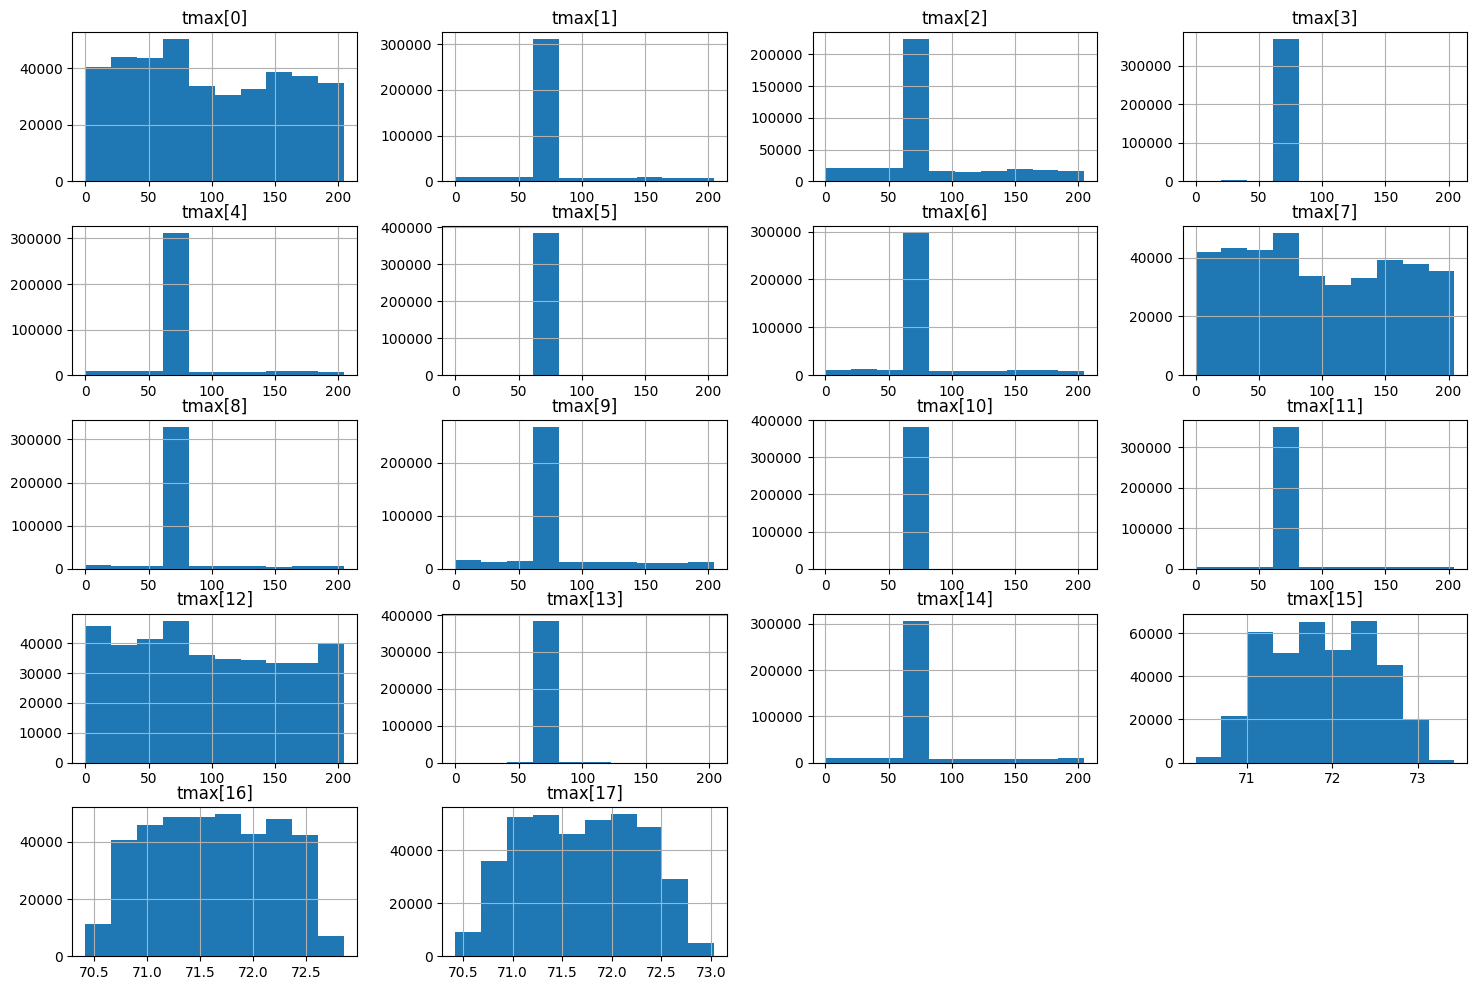

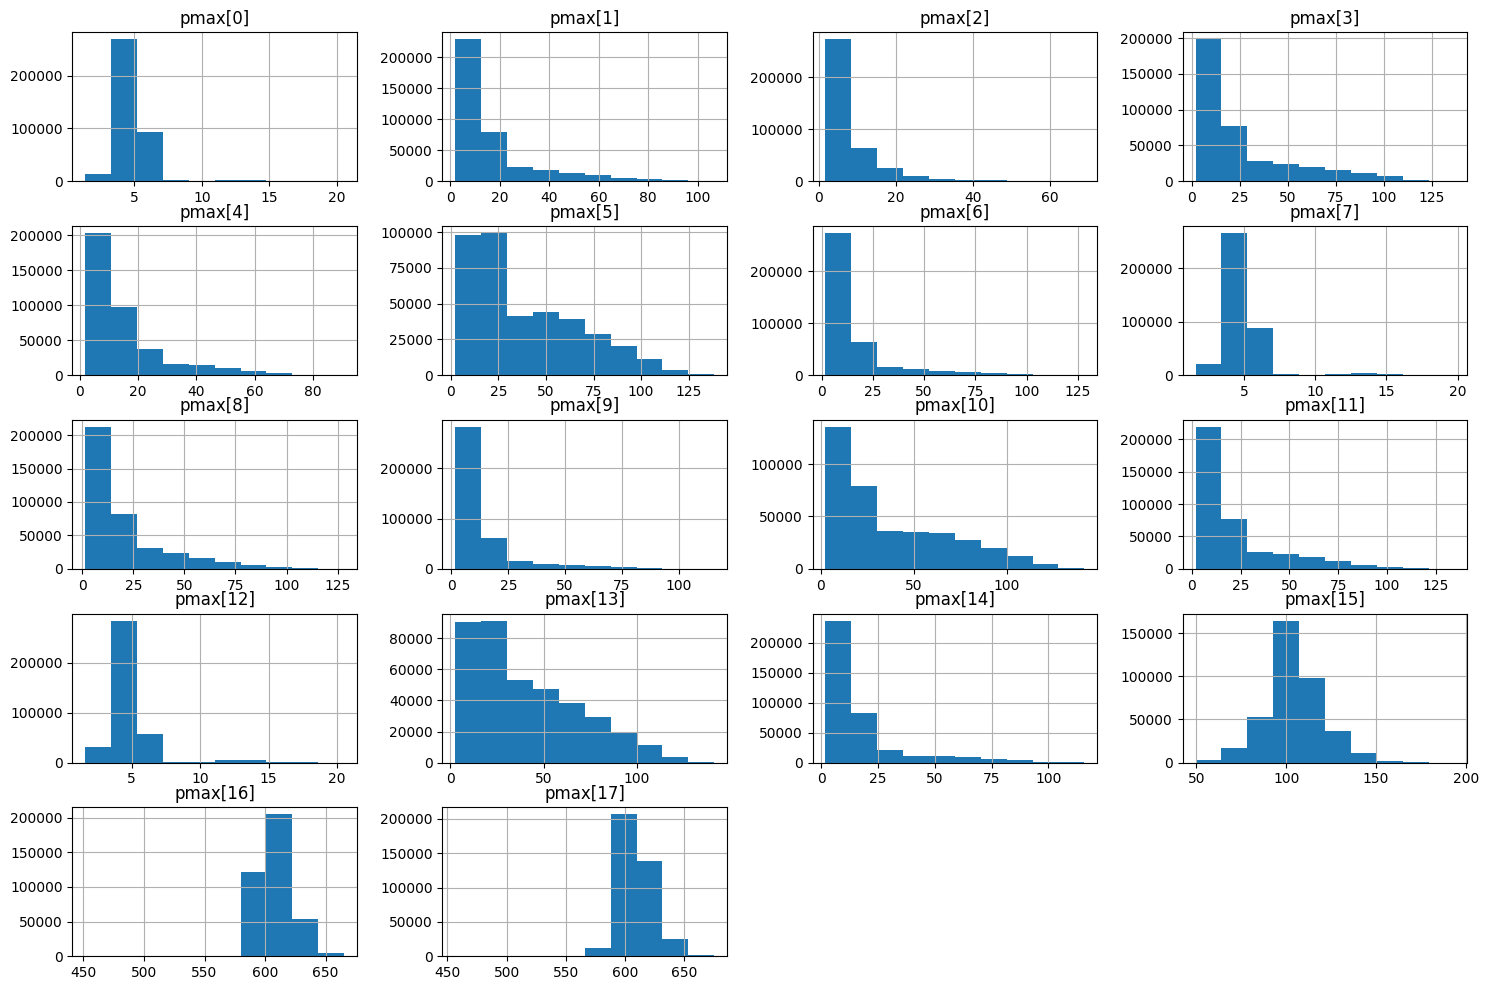

In [3]:
def generateColumnsNames(title, ignore=[]):
    out = []
    for i in range(0, 18):
        if(not i in ignore):
            out.append( title + "[" + str(i) + "]" )
    return out

columnTitles = ["tmax", "pmax"]
for columnTitle in columnTitles:
    columns = generateColumnsNames(columnTitle)
    dataset.hist(bins=10, column=columns, figsize=(18,12))


<Axes: title={'center': 'Position of the datapoints'}, xlabel='x', ylabel='y'>

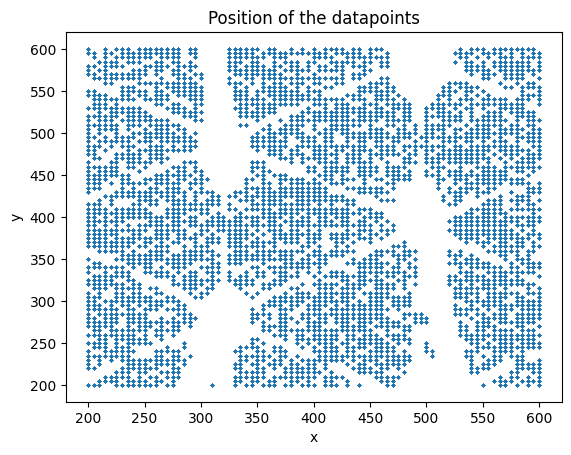

In [4]:
dataset.plot.scatter("x", "y", alpha=0.1, s=2, title="Position of the datapoints")

In [4]:
def generateColumnsNamesFromIndexes(indexes):
    out = []
    for index in indexes:
        for label in ["pmax", "negpmax", "area", "tmax", "rms"]:
            out.append(label + "[" + str(index) + "]")
    return out

regressionTargets = ['x', 'y']
noisyIndexes = [0, 7, 12, 15, 16, 17]
noisyFeatures= generateColumnsNamesFromIndexes(noisyIndexes)
featuresLabels = dataset.columns.drop(np.hstack([regressionTargets, noisyFeatures]))
X_df = dataset[featuresLabels]
Y_df = dataset[regressionTargets]

<Figure size 640x480 with 0 Axes>

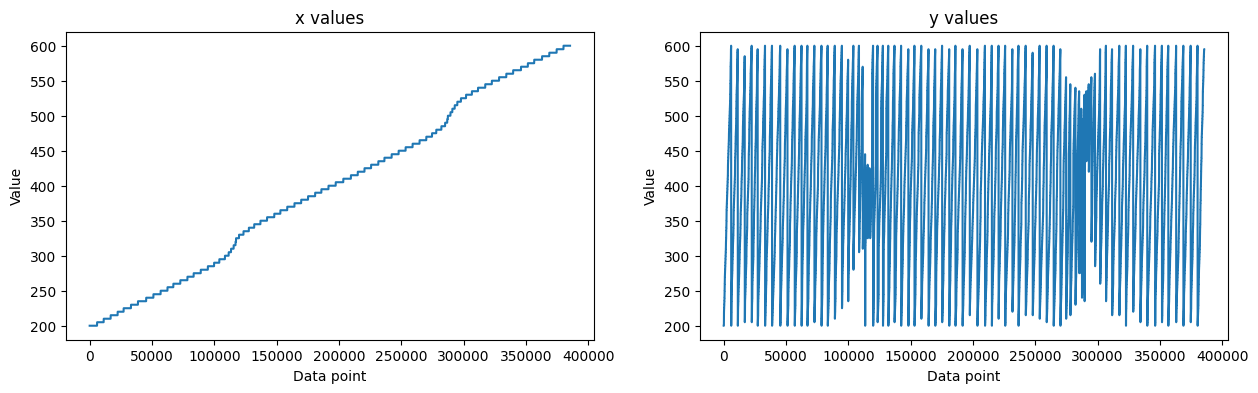

In [6]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(Y_df['x'])
ax[0].set_title("x values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(Y_df['y'])
ax[1].set_title("y values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()

<Figure size 640x480 with 0 Axes>

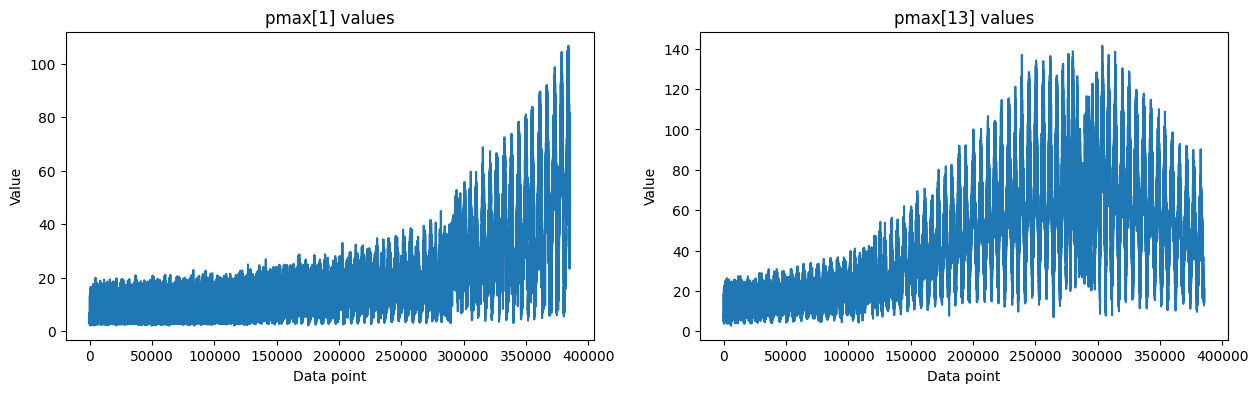

In [7]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(X_df['pmax[1]'])
ax[0].set_title("pmax[1] values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(X_df['pmax[13]'])
ax[1].set_title("pmax[13] values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()

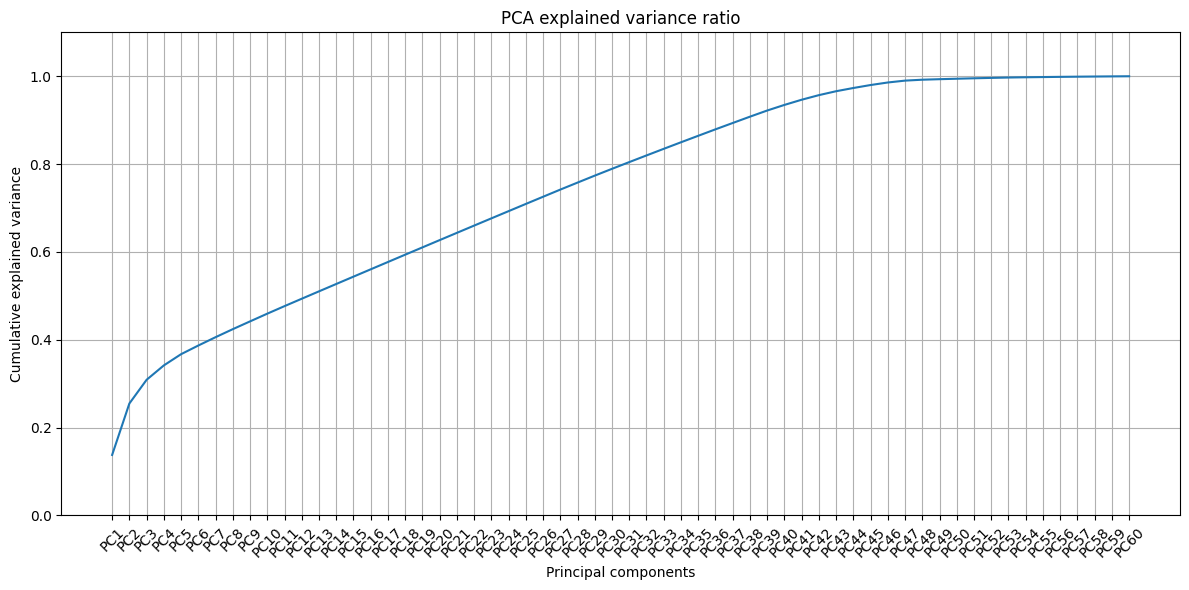

PCA(n_components=31)

In [5]:
pca = PCA()
scaler = StandardScaler()

X_sc = scaler.fit_transform(X_df.values)

pca.fit(X_sc)
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA explained variance ratio')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_),
labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)],
rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.tight_layout()
plt.show()

pca_31 = PCA(n_components=31)
pca_31.fit(X_sc)


In [9]:
#pd.concat([Y_df, X_df], axis="columns").corr()
pd.concat([Y_df, X_df], axis="columns").corr()[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]

,area[1],area[2],area[3],area[4],area[5],area[6],area[8],area[9],area[10],area[11],area[13],area[14],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
x,0.700687,0.374873,0.418804,-0.231869,-0.488755,-0.549963,-0.765399,-0.518958,-0.447658,0.363924,0.658242,0.668360,0.726619,0.477606,0.416501,-0.247361,-0.493251,-0.569413,-0.779363,-0.545835,-0.447803,0.361139,0.661260,0.679072
y,0.282344,0.376961,0.691197,0.700602,0.540429,0.465759,-0.074073,-0.458683,-0.646360,-0.700070,-0.117665,-0.352952,0.307673,0.516068,0.703649,0.760833,0.548665,0.490734,-0.086546,-0.490673,-0.658605,-0.714181,-0.126507,-0.366370
pmax[1],0.938971,0.538303,0.521822,-0.109415,-0.345956,-0.304583,-0.444430,-0.327988,-0.477042,-0.124584,0.405888,0.304834,1.000000,0.705026,0.523930,-0.115198,-0.352197,-0.314942,-0.449583,-0.340326,-0.478519,-0.136645,0.405503,0.300509
negpmax[1],-0.262689,-0.152683,-0.128307,0.036695,0.100243,0.071983,0.099132,0.071926,0.119734,0.051929,-0.078236,-0.061816,-0.286278,-0.200427,-0.129402,0.037074,0.101185,0.074068,0.098589,0.073098,0.118837,0.054215,-0.077677,-0.059546
area[1],1.000000,0.506243,0.495986,-0.107139,-0.325164,-0.297884,-0.433155,-0.320854,-0.448871,-0.098634,0.412177,0.304020,0.938971,0.656216,0.495165,-0.115601,-0.332792,-0.309423,-0.440033,-0.335047,-0.451493,-0.111431,0.411205,0.299327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmax[14],0.299327,-0.034683,-0.151902,-0.336153,-0.483750,-0.339090,-0.413906,-0.263768,-0.264846,0.533192,0.468270,0.962421,0.300509,-0.070002,-0.163507,-0.361447,-0.484719,-0.345906,-0.415195,-0.276081,-0.263912,0.535764,0.477135,1.000000
negpmax[14],-0.013768,0.004331,0.011642,0.015925,0.025462,0.012980,0.020184,0.014247,0.019889,-0.027139,-0.019024,-0.059206,-0.013589,0.006521,0.011955,0.016995,0.024852,0.012964,0.020153,0.014907,0.019625,-0.027130,-0.019487,-0.062532
area[14],0.304020,-0.022862,-0.134440,-0.327657,-0.470662,-0.338401,-0.409315,-0.258607,-0.252560,0.523162,0.464292,1.000000,0.304834,-0.055080,-0.146200,-0.353612,-0.472349,-0.346440,-0.411929,-0.272327,-0.253329,0.524076,0.470878,0.962421
tmax[14],-0.121765,-0.058506,-0.076048,0.103546,0.099176,0.182867,0.177368,0.102823,-0.002033,-0.126486,-0.189325,-0.131687,-0.121550,-0.071625,-0.073185,0.114310,0.102081,0.193127,0.183235,0.111928,-0.001710,-0.123833,-0.188431,-0.127377


## Test set split

In [6]:
ratio = 0.2
test_length = int(len(X_df) * 0.2)
train_length = len(X_df) - test_length
test_mask = np.array(test_length * [True] + train_length * [False])
np.random.shuffle(test_mask)
X_test = X_df.values[test_mask, :]
Y_test = Y_df.values[test_mask, :]
X_train = X_df.values[~test_mask, :]
Y_train = Y_df.values[~test_mask, :]

#tain-test split on a subset of features
X_red_df = X_df[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]
X_test_red = X_red_df.values[test_mask, :]
X_train_red = X_red_df.values[~test_mask, :]

## Regression

In [7]:
def euc_dist(Y, Y_pred):
    #return np.sqrt(((Y_pred - Y_test)**2).sum(axis=1)).sum(axis=0) / Y_pred.shape[0]
    return np.sqrt(((Y - Y_pred)**2).sum(axis=1)).mean()

euc_dist_scorer = make_scorer(euc_dist)

In [10]:
#linear regression 
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
Y_pred = linReg.predict(X_test)
print(f"Linear regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Linear regression. Euclidean distance score: 17.69 


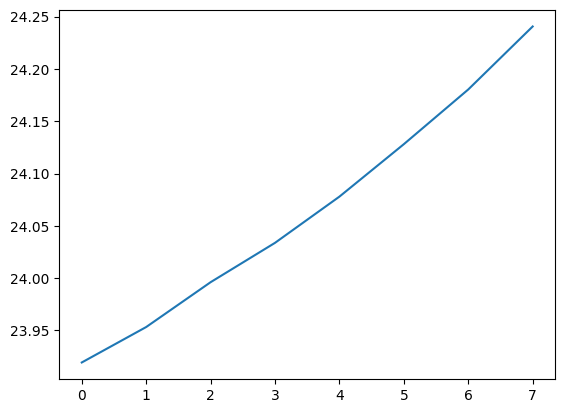

Lasso grid search results. Best params: {'alpha': 0.2}
Lasso regression. Euclidean distance score: 17.70 


In [11]:
#lasso regression
params = {
    "alpha": np.arange(0.2, 1.8, 0.2)
}
scores = []
for config in ParameterGrid(params):
    reg = Lasso(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Lasso grid search results. Best params: {best_params}")

#evaluate on best params
lassoReg = Lasso(random_state=rs, **best_params)
lassoReg.fit(X_train, Y_train)
Y_pred = lassoReg.predict(X_test)
print(f"Lasso regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


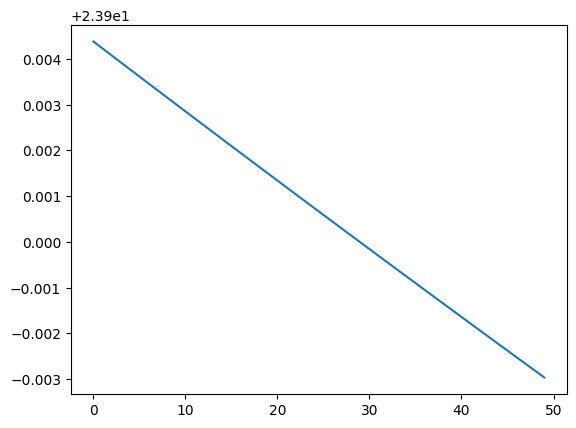

Ridge grid search results. Best params: {'alpha': 4910}
Ridge regression. Euclidean distance score: 17.69 


In [12]:
#Ridge regression
params = {
    "alpha": np.arange(10, 5001, 100)
}
scores = []
for config in ParameterGrid(params):
    reg = Ridge(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Ridge grid search results. Best params: {best_params}")

#evaluate on best params
ridgeReg = Ridge(random_state=rs, **best_params)
ridgeReg.fit(X_train, Y_train)
Y_pred = ridgeReg.predict(X_test)
print(f"Ridge regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


## Polynomial regression

In [8]:
#polynomial transformation
PL = PolynomialFeatures(degree=2)
std_scaler = StandardScaler()
X_train_pl = PL.fit_transform(X_train_red)
X_test_pl = PL.transform(X_test_red)

X_train_pl = std_scaler.fit_transform(X_train_pl)
X_test_pl = std_scaler.transform(X_test_pl)

In [13]:
#linear polynomial regression
linReg = LinearRegression()
linReg.fit(X_train_pl, Y_train)
Y_pred = linReg.predict(X_test_pl)
print(f"Linear ploynomial regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Linear ploynomial regression. Euclidean distance score: 9.35 


C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.329e+05, tolerance: 1.967e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e+05, tolerance: 2.019e+05
  model = cd_fast.enet_coordinate_descent(


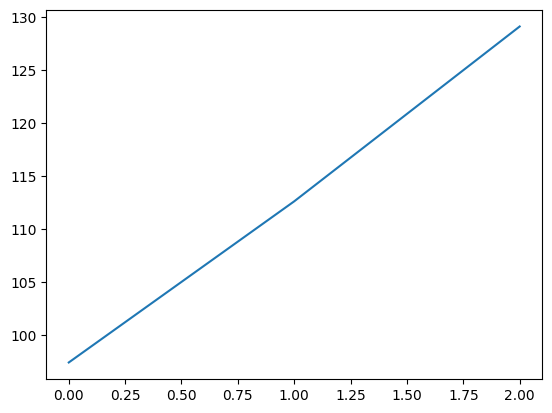

Lasso polynomial grid search results. Best params: {'alpha': 0.2}


C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.946e+06, tolerance: 4.483e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.905e+06, tolerance: 3.985e+05
  model = cd_fast.enet_coordinate_descent(


Lasso polynomial regression. Euclidean distance score: 12.29 


In [14]:
#lasso polynomial regression
params = {
    "alpha": np.arange(0.2, 1.8, 0.6)
}
scores = []
for config in ParameterGrid(params):
    reg = Lasso(selection="random", random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train_pl, Y_train, cv=2, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Lasso polynomial grid search results. Best params: {best_params}")

#evaluate on best params
lassoReg = Lasso(random_state=rs, **best_params)
lassoReg.fit(X_train_pl, Y_train)
Y_pred = lassoReg.predict(X_test_pl)
print(f"Lasso polynomial regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

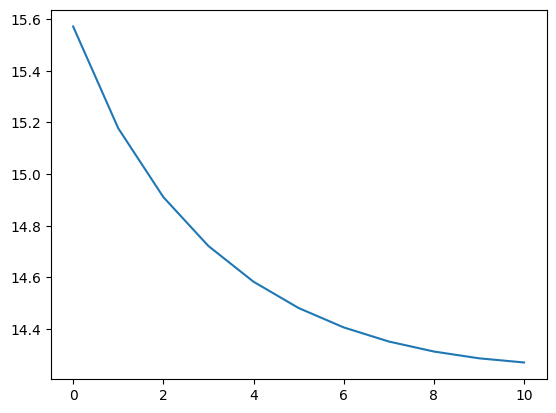

Ridge grid search results. Best params: {'alpha': 500}
Ridge regression. Euclidean distance score: 9.66 


In [17]:
#Ridge regression
params = {
    "alpha": np.arange(100, 501, 40)
}
scores = []
for config in ParameterGrid(params):
    reg = Ridge(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train_pl, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Ridge grid search results. Best params: {best_params}")

#evaluate on best params
ridgeReg = Ridge(random_state=rs, **best_params)
ridgeReg.fit(X_train_pl, Y_train)
Y_pred = ridgeReg.predict(X_test_pl)
print(f"Ridge regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

## Random forest

In [9]:
RFReg = RandomForestRegressor(random_state=rs, max_samples=0.4, n_jobs=-1)
RFReg.fit(X_train_red, Y_train)
Y_pred = RFReg.predict(X_test_red)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Random forest regression. Euclidean distance score: 5.65 


In [14]:
display(np.array([est.tree_.max_depth for est in RFReg.estimators_]).mean())

31.49

In [ ]:
#Random forest regression
params = {
    "n_estimators": [100],
    "max_features": ["log2", "sqrt", None],
    "max_samples" : [0.4],
    "max_depth": [22, 25, 28, None]
}
scores = []
iter=0
for config in ParameterGrid(params):
    print(f"Iteration number: {iter}")
    iter += 1
    reg = RandomForestRegressor(random_state=rs, n_jobs=-1, **config)
    scores.append(cross_val_score(reg, X_train_red, Y_train, cv=3, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Random forest grid search results. Best params: {best_params}")

#evaluate on best params
RFReg = RandomForestRegressor(random_state=rs, n_jobs=-1, **best_params)
RFReg.fit(X_train_red, Y_train)
Y_pred = RFReg.predict(X_test_red)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5


## Support vector regression

In [ ]:
#support vector regression
st_scaler = StandardScaler()
X_train_sc = st_scaler.fit_transform(X_train_red)
X_test_sc = st_scaler.transform(X_test_red)
params = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "degree" : [2, 3]
    #"epsilon": np.arange(0.1, 1.1, 0.2)
}

scores = []
for config in ParameterGrid(params):
    reg = MultiOutputRegressor(SVR(max_iter=100**config))
    scores.append(cross_val_score(reg, X_train_sc, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Support vector regression grid search results. Best params: {best_params}")

#evaluate on best params
SVReg = MultiOutputRegressor(SVR(**best_params))
SVReg.fit(X_train_sc, Y_train)
Y_pred = SVReg.predict(X_test_sc)
print(f"Support vector regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


## Final results

In [29]:
EVALUATIONPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/evaluation.csv"
evaluation = pd.read_csv(EVALUATIONPATH, index_col="Id")
X_ev = evaluation[featuresLabels]
X_ev = X_ev[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]
Y_ev = RFReg.preidct(X_ev)


,area[1],area[2],area[3],area[4],area[5],area[6],area[8],area[9],area[10],area[11],area[13],area[14],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
Id,,,,,,,,,,,,,,,,,,,,,,,,
0,5.554105,3.547230,9.340524,13.883821,13.256760,4.333748,3.005078,3.856479,10.736060,14.375482,28.716632,8.623282,8.738040,5.359271,11.347125,6.577531,13.810622,5.807178,4.062283,5.639908,21.683093,28.915939,61.340985,17.802664
1,17.998419,11.315171,47.867699,4.384134,9.597168,3.667720,3.176204,3.991943,6.397792,1.937633,14.635765,6.507688,23.460358,20.116995,95.746893,9.116190,15.019028,5.040857,4.791379,4.849396,4.520874,3.742776,23.587567,10.272607
2,3.289124,3.578799,5.374246,4.730027,20.932079,13.511074,49.086918,13.048237,20.058053,6.131667,11.301154,3.488582,4.837952,6.132150,7.510110,8.659167,40.196329,25.438550,97.682349,20.836282,39.527005,8.480679,12.934276,3.556735
3,38.422989,10.306552,33.719995,6.235400,8.365226,2.590944,2.757816,5.919363,7.160350,5.092703,22.661873,9.713149,87.293692,25.325571,63.661270,10.279163,14.319162,5.165152,5.041263,5.294766,9.139548,6.760588,43.858466,16.255322
4,7.767408,3.765579,7.939478,4.964267,25.228199,5.172855,13.542758,6.172327,44.170484,11.734297,32.614696,7.130603,9.593125,6.618451,13.074960,8.634232,49.161887,9.388931,23.921475,9.744598,92.394315,20.895435,54.800885,10.197021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128495,6.657654,11.514778,7.715925,2.859265,12.549082,3.780566,6.840471,6.794162,29.585670,36.512172,26.922277,13.170802,9.327438,4.763165,7.936588,4.233447,18.617259,6.040512,7.677029,10.442093,55.663474,70.319571,54.351236,22.433310
128496,4.184656,4.475711,3.358511,5.270386,9.344316,4.340132,12.989719,21.077448,43.998438,13.006979,8.782450,2.264683,5.833882,3.790421,4.913111,5.210510,14.838510,5.683057,22.623154,42.759137,94.134872,21.627643,15.090143,4.467065
128497,11.304202,9.256798,52.297519,20.998639,19.438531,6.508219,1.970108,5.564379,6.695656,1.915229,13.958058,2.049936,19.402353,17.555460,115.297141,31.533389,31.085330,12.011295,4.220743,3.846027,6.960260,5.303397,23.518393,4.901157


In [ ]:
output = pd.DataFrame()
output['Predicted'] = (Y_ev[0, :]).astype(str) + "|" + (Y_ev[1, :]).astype(str)
output.to_csv("prova.csv", index_label="Id")